# **Convolutional Neural Network**

**1. Load libraries**

In [ ]:
#Oscar Daniel Leal Maldonado
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


**2. Load Data**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0



**3. Preprocessing**

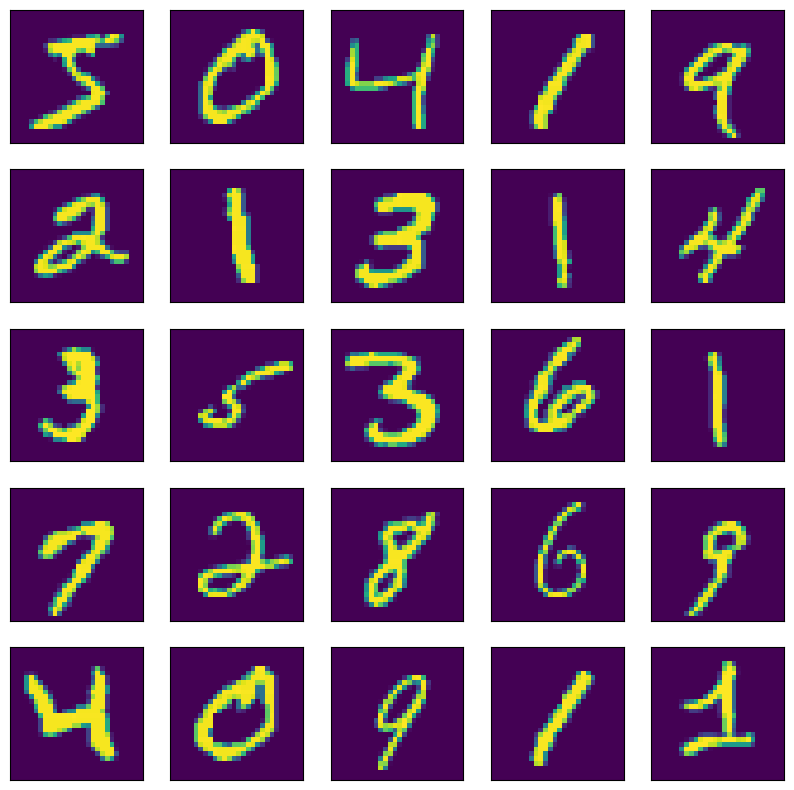

In [ ]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,

plt.show()


**4. Model selection and training**

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Activación softmax en la capa de salida
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)



Epoch 1/10
1688/1688 [==============================] - 73s 42ms/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.0414 - val_accuracy: 0.9918
Epoch 2/10
1688/1688 [==============================] - 57s 33ms/step - loss: 0.0073 - accuracy: 0.9978 - val_loss: 0.0395 - val_accuracy: 0.9922
Epoch 3/10
1688/1688 [==============================] - 58s 34ms/step - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.0453 - val_accuracy: 0.9913
Epoch 4/10
1688/1688 [==============================] - 57s 34ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0411 - val_accuracy: 0.9912
Epoch 5/10
1688/1688 [==============================] - 58s 34ms/step - loss: 0.0062 - accuracy: 0.9979 - val_loss: 0.0438 - val_accuracy: 0.9923
Epoch 6/10
1688/1688 [==============================] - 58s 34ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0479 - val_accuracy: 0.9925
Epoch 7/10
1688/1688 [==============================] - 56s 33ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.0532 -

**5. Model testing**

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Realizar 5 predicciones y mostrar los resultados
predictions = model.predict(test_images[:5])
predicted_labels = tf.argmax(predictions, axis=1)


# Mostrar las predicciones y las etiquetas reales con el nombre de las clases
for i in range(5):
    predicted_class = class_names[predicted_labels[i]]
    actual_class = class_names[test_labels[i]]
    print(f"Predicted: {predicted_class}, Actual: {actual_class}")

313/313 [==============================] - 4s 12ms/step - loss: 0.0483 - accuracy: 0.9928
Test accuracy: 0.9927999973297119
1/1 [==============================] - 0s 163ms/step
Predicted: Seven, Actual: Seven
Predicted: Two, Actual: Two
Predicted: One, Actual: One
Predicted: Zero, Actual: Zero
Predicted: Four, Actual: Four


In [ ]:
#Plot
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

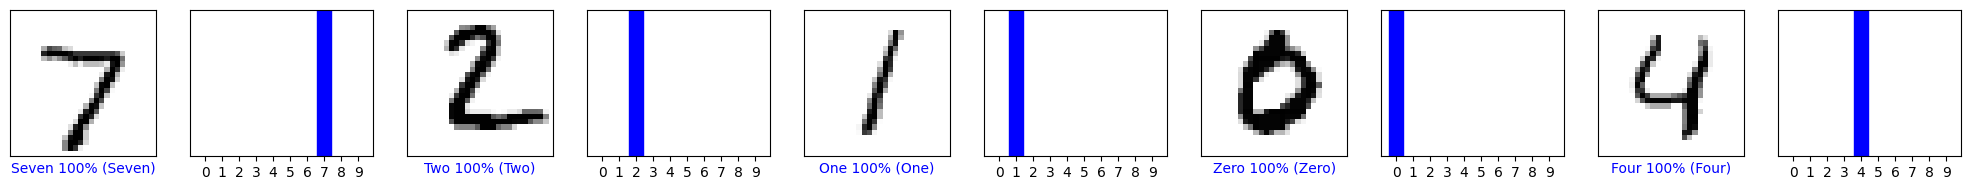

In [ ]:
num_rows = 1
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()